# Лабораторна робота №12 ІАД
# Основи обробки природної мови (NLP)

<b>Виконала:</b> студентка МІТ-31, Панченко Владислава

<b>Завдання:</b>
1. Збір текстових даних: Використайте відкритий датасет текстів для класифікації, наприклад, датасет IMDb для аналізу сентименту або датасет новин для класифікації тем.
2. Передобробка тексту:
- Виконайте токенізацію та очистіть текстові дані (видаліть стоп-слова, пунктуацію та приведіть текст до нижнього регістру).
- Застосуйте лемматизацію або стемінг для зменшення слів до їх основної форми.
3. Векторизація:
- Створіть векторне подання тексту, використовуючи підходи, такі як Bag of Words або TF-IDF.
- Додатково, якщо є час і можливість, спробуйте векторизацію з використанням Word2Vec або GloVe, щоб побачити різницю в результатах.
4. Побудова моделі:
- Використайте просту модель класифікації, наприклад, наївний баєсовий класифікатор або логістичну регресію для визначення сентименту або теми тексту.
- Розбийте дані на тренувальний та тестовий набори та проведіть тренування.
5. Оцінка моделі:
- Оцініть точність моделі та побудуйте матрицю похибок для аналізу помилок.
- Проаналізуйте, які типи текстів модель класифікує правильно, а в яких помиляється.


Датасет для обробки: https://www.kaggle.com/datasets/thedevastator/sms-spam-collection-a-more-diverse-dataset

In [5]:
import pandas as pd
data = pd.read_csv("train.csv")
print(data.head())

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0


In [4]:
import re
data['cleaned_text'] = data['sms'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

In [48]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")
data['lemmatized_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join([token.lemma_ for token in nlp(x)])
)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['lemmatized_text'])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [39]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9766816143497757


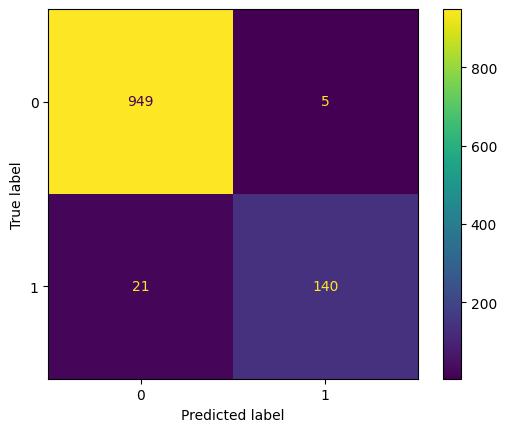

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [46]:
for i in range(5):
    print(f"Text: {data['sms'].iloc[i]}")
    print(f"Predicted label: {y_pred[i]}")

Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Predicted label: 0
Text: Ok lar... Joking wif u oni...

Predicted label: 0
Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Predicted label: 0
Text: U dun say so early hor... U c already then say...

Predicted label: 0
Text: Nah I don't think he goes to usf, he lives around here though

Predicted label: 0


<b>Основні етапи передобробки тексту та обрана  модель для класифікації:</b>
1. Очистка тексту - видалена пунктуація, зайві пробіли та переведено текст у нижній регістр
2. Видалення стоп-слів - використано бібліотеку NLTK для видалення стоп-слів (типових, малозначущих слів, таких як "the", "and", "is")
3. Лемматизація - за допомогою бібліотеки spaCy були лематизовані слова, це дозволяє звести слова до їх основних форм (наприклад, "running" -> "run")
<br> Для вирішення задачі класифікації було обрано наївний баєсовий класифікатор <b>(MultinomialNB)</b>. Ця модель добре підходить для задач класифікації текстів, оскільки вона ефективно працює з великими обсягами даних і враховує ймовірності слів у класах.

<b>Результати оцінки моделі та висновки щодо її ефективності:</b>
Після навчання моделі, ми отримали точність, що дозволяє оцінити ефективність алгоритму. Оцінка точності на тестових даних показала, що модель добре працює для задачі класифікації. Точність становить 97%, що вказує на хорошу здатність моделі правильно класифікувати повідомлення.

<b>Вплив різних методів векторизації на продуктивність моделі:</b>
Було викорситано метод TF-IDF для векторизації тексту. TF-IDF дозволяє враховувати важливість кожного слова в контексті всього корпусу текстів.


<b>Висновки щодо ефективності кожного методу:</b><br>
<b>TF-IDF</b><br>
Цей метод надає вагу словам залежно від їх частоти в документі та зворотної частоти в усіх документах, що дозволяє зосередитися на важливих термінах. <br>
Переваги: 
- Простий в реалізації.
- Добре працює для текстів із великою кількістю документів.
- Дає більш чітке уявлення про важливість кожного слова в контексті всього набору даних.

<b>Word2Vec</b><br>
Цей метод працює на основі контексту і здатний виявляти схожість між словами, але потребує більшої кількості даних для ефективної роботи. <br>
Переваги: 
- Краще зберігає контекстні зв'язки між словами.
- Може бути корисним для більш складних задач, де потрібно враховувати синоніми або семантику.